In [1]:
import re
from pypdf import PdfReader

In [2]:
# colocar o seu histórico nesta pasta e trocar o nome na variavel
historico_pdf = "historico_2022004897_murilo.pdf"

In [11]:
reader = PdfReader(historico_pdf)
number_of_pages = len(reader.pages)
historico_texto = []
# with open(historico_texto, "w") as f:
for i in range(0, number_of_pages):
    page = reader.pages[i]
    text = page.extract_text()
    historico_texto.append(text.split("\n"))
pattern = r"Integralizado"
# open_file = open(historico_texto, "r")
horas_integralizadas = []
# le linha por linha e insere na lista "texto"
for page in range(len(historico_texto)):
    for line in range(len(historico_texto[page])):
        if re.search(pattern, historico_texto[page][line]):
            horas_integralizadas.append(
                historico_texto[page][line + 4].split(" "))
horas_integralizadas = int(horas_integralizadas[0][0])

880

In [12]:
# pattern declara o REGEX a ser procurado no texto
pattern = (
    r"APR|APRN|CANC|DISP|MATR|REC|REP|REPF|REPMF|REPN|REPNF|TRANC|TRANS|INCORP|CUMP"
)

pattern_iepl = r"hComplementares"


# open_file = open(historico_texto, "r")


texto = []
carga_horaria = []


# le linha por linha e insere na lista "texto"


for page in historico_texto:
    for line in page:
        if re.search(pattern, line):
            texto.append(line.split(" "))

        if re.search(pattern_iepl, line):
            carga_horaria.append(line.split(" "))


carga_necessaria = int(carga_horaria[0][4][1:])
carga_cumprida = int(carga_horaria[0][3][1:])


materias_aluno = []


# nao pega as ultimas treze linhas do texto pq é a parte que explica o que é cada situação de matéria, possivelmente vai ter q ajustar para fazer a limpeza dos outros
for i in range(len(texto) - 13):
    materias_aluno.append([texto[i][1], texto[i][2], texto[i][3], texto[i][5]])


# materias_aluno
# texto

[['2698', 'h', '1512', 'h816', 'h2328', 'hComplementares']]

In [5]:
semestre = int(historico_texto[0][23])
semestre
# historico_texto

4

In [6]:
pattern_sin = r"SISTEMAS DE INFORMAÇÃO/IMC"
pattern_cco = r"SISTEMAS DE INFORMAÇÃO/IMC"
texto = []
cco = False
sin = False
# le linha por linha e insere na lista "texto"
for page in historico_texto:
    for line in page:
        if re.search(pattern_sin, line):
            sin = True
            break
        if re.search(pattern_cco, line):
            cco = True
            break
print(sin)
print(cco)

True
False


---
## MC

In [7]:
# DEU CERTO
soma_nota_carga = 0
soma_carga = 0
for materia in materias_aluno:
    if materia[3] != "--" and materia[0] == "APR":
        soma_nota_carga += float(materia[2]) * float(materia[3])
        soma_carga += float(materia[2])
mc = round(soma_nota_carga / soma_carga, 4)
print(mc)

7.9982


---
## IECH

In [8]:
soma_carga = 0
carga_total = 0
materias_aprovadas = ["APR", "APRN", "CUMP", "INCORP"]
materia_reprovadas = ["REP", "REPF", "REPMF", "REPN", "REPNF", "TRANC"]
for materia in materias_aluno:
    if materia[0] in materias_aprovadas:
        soma_carga += int(materia[2])
    if materia[0] in materias_aprovadas or materia[0] in materia_reprovadas:
        carga_total += int(materia[2])
# print(soma_carga)
# print(carga_total)
iech = round(soma_carga / carga_total, 4)
print(iech)

0.875


---
## IEPL

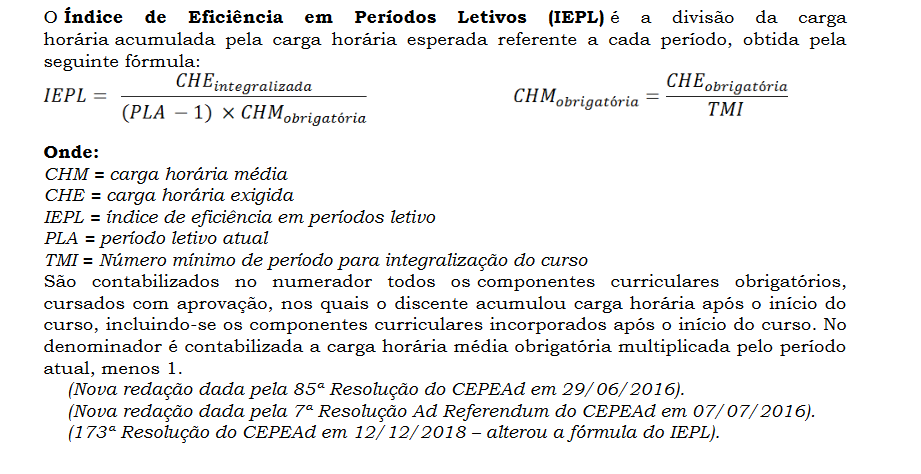

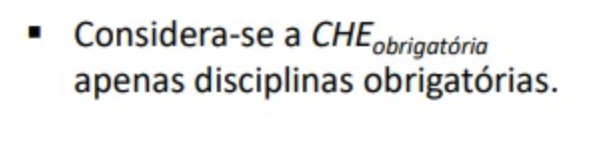

In [13]:
hora_total_aula_sin = 2328
# total = 3578
# periodo minimo do aluno de sistemas
periodo_minimo_sin = 9


carga_media_obrigatoria = carga_necessaria / periodo_minimo_sin
iepl = round((carga_cumprida) / ((semestre - 1) * carga_media_obrigatoria), 5)

# iepl = round(horas_integralizadas / carga_media_obrigatoria, 1)

if iepl > 1.1:
    iepl = 1.1
print(iepl)

1.05155


---
## IEA

In [10]:
iea = round(mc * iech * iepl, 4)
iea

7.3592

| ABREVIAÇÃO | SIGNIFICADO | SITUAÇÃO 
| -- | -- | -- |
|APR| Aprovado por média| Aluno aprovado com média maior ou igual a 6,0.|
|APRN| Aprovado por nota mínima| Aluno com média entre 6,0 e 6,0 e nota mínima superior a 0,0 após a substituição.|
|CANC| Cancelado| Matrícula em turma cancelada.|
|DISP| Dispensado| Aproveitou o componente e foi dispensado.|
|MATR| Matriculado| Matriculado na turma.|
| REC |  Em recuperação | Aluno que fará reposição.|
|REP|Reprovado por média|Aluno com média inferior a 6,0.|
|REPF| Reprovado por falta| Reprovado por não atender os critérios de assiduidade.|
|REPMF| Reprovado por média e falta| Aluno com média inferior a 6,0 além de não atender aos critérios de assiduidade.|
|REPN| Reprovado por nota mínima| Aluno com média entre 6,0 e 6,0 e nota mínima inferior a 0,0 após a substituição.|
|REPNF| Reprovado por nota e falta|Aluno com média entre 6,0 e 6,0 e nota mínima inferior a 0,0 após a substituição além de não atender aos critérios de assiduidade.|
|TRANC| Trancado| Matrícula em turma trancada.|
|TRANS| Transferido| Fez o componente em outra instituição e aproveitou na Instituição.|
|INCORP| Incorporado| Fez o componente durante mobilidade estudantil.|
|CUMP| Cumpriu| Fez o componente na UNIFEI em outro curso anterior e aproveitou no curso atual.|

| INDICE | EXPLICAÇÃO|
| -- | -- |
| MC |A Média de Conclusão (MC) é a media do rendimento escolar final obtido pelo aluno nos componentes curriculares em que obteve êxito, ponderadas pela carga horária discente dos componentes.|
|IRA| 	O Índice de Rendimento Acadêmico (IRA) é a média do rendimento escolar final obtido pelo aluno nos componentes curriculares que concluiu, ponderadas pela carga horária discente dos componentes.|
|IECH| 	O Índice de Eficiência em Carga Horária (IECH) é divisão da carga horária com aprovação pela carga horária utilizada.|
|IEPL| 	O Índice de Eficiência em Períodos Letivos (IEPL) é divisão da carga horária acumulada pela carga horária esperada.|
|IEA| 	O Índice de Eficiência Acadêmica (IEA) é o produto da MC pelo IECH e pelo IEPL.|
|IECHS| 	O Índice de Eficiência em Carga Horária Semestral (IECHs) é o percentual da carga horária utilizada pelo discente que se converteu em aprovação no semestre anterior.|

**Índice de Eficiência em Carga Horária (IECH):** \
visa indicar o percentual da carga horária dos componentes curriculares em que o discente consegue aprovação. Esse índice é usado para definir a carga horária máxima em que um discente pode se matricular; \

**Índice de Eficiência em Períodos Letivos (IEPL):** \
visa indicar o percentual da carga realizada pela carga esperada de um discente nos períodos do seu curso. Desta forma, mostra se o discente está em fase ou atrasado em relação ao tempo mínimo de conclusão do curso;

**Índice de Eficiência Acadêmica (IEA):** \
índice global de eficiência do discente, formado pela multiplicação dos índices anteriores. Usado como critério de prioridade, observado o disposto da norma, para a matrícula em componentes curriculares, o qual já estará vigente para o primeiro período de 2016. Esse índice também é usado para desligamento do discente, sendo que não será aplicado em 2015 e começará a contar a partir do primeiro período de 2016. Dessa maneira, só poderá acontecer o desligamento em 2017;

**Índice de Eficiência Acadêmica Normalizado (IEAN) e Média de Conclusão Normalizado (MCN):** \
normalização do MC e do IEA, respectivamente, que compara a média do aluno com a média das médias dos concluintes do curso nos últimos cinco anos. Tem o objetivo de verificar os índices dos discentes com turmas do mesmo curso por um período histórico de cinco anos.


---
**Média de Conclusão (MC)** \

A Média de Conclusão (MC) é a média ponderada do rendimento escolar final nos componentes curriculares em que conseguiu êxito ao longo do curso, obtida pela seguinte fórmula: \

![image.png](formulaMC.png) \

Nessa fórmula, são contabilizados todos os Nx componentes curriculares concluídos com êxito, incluindo os aproveitamentos, onde ni é a nota (rendimento escolar) final obtida no i-ésimo componente curricular e ci é a carga horária discente do i-ésimo componente curricular. São excluídos do cálculo os componentes curriculares trancados, cancelados, reprovados e dispensados, as atividades complementares e os componentes curriculares cujo rendimento escolar não é expresso de forma numérica.

---
**Média de Conclusão Normalizada (MCN)**
 

A Média de Conclusão Normalizada (MCN) é a MC do aluno normalizada em relação à média (μ) e desvio padrão amostral (σ) das MCs dos concluintes da mesma modalidade do curso, obtida pela seguinte fórmula:

![image.png](formulaMCN1.png) \
Nessa fórmula, MC é a Média de Conclusão do aluno para o qual está sendo calculada a MCN. A média (μ) e desvio padrão amostral (σ) são calculados pela seguinte fórmula:
![image.png](formulaMCN2.png) \
Nessas fórmulas, são contabilizados todos os M alunos que concluíram o mesmo curso/modalidade nos últimos 05 (cinco) anos, onde MCi é a Média de Conclusão final obtida pelo i-ésimo concluinte. São excluídos do cálculo os alunos que não concluíram com êxito o curso por qualquer motivo bem como aqueles que fizeram apenas apostilamento de habilitação ou certificação de ênfase.

---
**Índice de Rendimento Acadêmico (IRA)**
 

O Índice de Rendimento Acadêmico (IRA) é a média ponderada do rendimento escolar final obtido pelo aluno em todos os componentes curriculares que concluiu ao longo do curso, obtida pela seguinte fórmula:

![image.png](formulaIRA.png) 

Nessa fórmula, são contabilizados todos os N componentes curriculares concluídos, seja com aprovação ou com reprovação por nota ou frequência, onde ni é a nota (rendimento escolar) final obtida no i-ésimo componente curricular e ci é a carga horária discente do i-ésimo componente curricular. São excluídos do cálculo os componentes curriculares trancados, cancelados e dispensados, as atividades complementares e os componentes curriculares cujo rendimento escolar não é expresso de forma numérica.

---
**Índice de Eficiência em Carga Horária (IECH)**
 

O Índice de Eficiência em Carga Horária (IECH) é o percentual da carga horária utilizada pelo aluno que se converteu em aprovação, obtido pela seguinte fórmula:

![](formulaIECH.png)


Nessa fórmula, são contabilizados no numerador todos os  \
Np =  componentes curriculares em que o aluno obteve aprovação, \
 excluindo-se os componentes : \
    curriculares trancados, \
    cancelados, reprovados, \
    aproveitados e dispensados,  \
    as atividades complementares, \
    as atividades individuais e \
    as atividades de orientação individual. 
    
    
São contabilizados no denominador todos os Nm componentes curriculares em que o aluno se matriculou, incluindo os trancamentos, reprovações e cancelamentos de matrícula e excluindo-se os componentes curriculares aproveitados e dispensados, as atividades complementares, as atividades individuais e as atividades de orientação individual. ci é a carga horária discente do i-ésimo componente curricular.

---
**Índice de Eficiência em Períodos Letivos (IEPL)**
 

O Índice de Eficiência em Períodos Letivos (IEPL) é divisão da carga horária acumulada pela carga horária esperada, obtida pela seguinte fórmula:

![](formulaIEPL.png)


Nessa fórmula, são contabilizados todos os Na componentes curriculares em que o aluno acumulou carga horária depois que ingressou no curso de graduação, excluindo-se os componentes curriculares aproveitados. ci é a carga horária discente do i-ésimo componente curricular. P é o número de períodos já cursados pelo aluno. CHM e PM são a carga horária mínima e o prazo médio, respectivamente, para integralização da estrutura curricular do aluno.


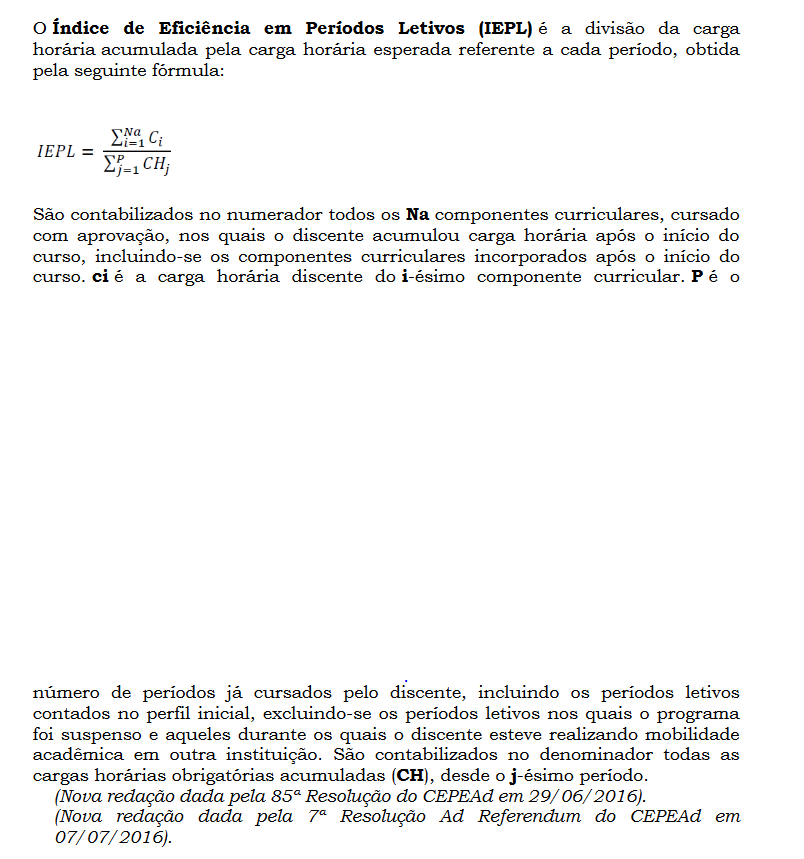

---
**Índice de Eficiência Acadêmica (IEA)**
 

O Índice de Eficiência Acadêmica (IEA) é o produto da MC pelo IECH e pelo IEPL, conforme a seguinte fórmula:
 

IEA = MC × IECH × IEPL
 

Índice de Eficiência Acadêmica Normalizado (IEAN)
 

O Índice de Eficiência Acadêmica Normalizado (IEAN) é o produto da MCN pelo IECH e pelo IEPL, conforme a seguinte fórmula:
 

IEAN = MCN × IECH × IEPL